#Question 4:
Are there films whose relationship portrayals deviate substantially from dominant age- and gender-based patterns, and what characteristics distinguish these atypical cases from the majority of Hollywood productions?

Namne:Tzu-Hsuan Liu

#Import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-14/age_gaps.csv"
age_gaps = pd.read_csv(url)

age_gaps.columns = age_gaps.columns.str.lower()

# parse dates
date_cols = [c for c in age_gaps.columns if "birthdate" in c]
for c in date_cols:
    age_gaps[c] = pd.to_datetime(age_gaps[c], errors="coerce")

age_gaps.info()
age_gaps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_name          1155 non-null   object        
 1   release_year        1155 non-null   int64         
 2   director            1155 non-null   object        
 3   age_difference      1155 non-null   int64         
 4   couple_number       1155 non-null   int64         
 5   actor_1_name        1155 non-null   object        
 6   actor_2_name        1155 non-null   object        
 7   character_1_gender  1155 non-null   object        
 8   character_2_gender  1155 non-null   object        
 9   actor_1_birthdate   1155 non-null   datetime64[ns]
 10  actor_2_birthdate   1155 non-null   datetime64[ns]
 11  actor_1_age         1155 non-null   int64         
 12  actor_2_age         1155 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


#EDA & Data Preprocessing

In [ ]:
age_gaps.isna().sum()

,0
movie_name,0
release_year,0
director,0
age_difference,0
couple_number,0
actor_1_name,0
actor_2_name,0
character_1_gender,0
character_2_gender,0
actor_1_birthdate,0


In [ ]:
age_gaps.describe()

,release_year,age_difference,couple_number,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
count,1155.000000,1155.000000,1155.000000,1155,1155,1155.000000,1155.000000
mean,2000.799134,10.424242,1.398268,1960-09-07 07:15:07.012987008,1971-01-29 13:09:11.688311688,40.635498,30.211255
min,1935.000000,0.000000,1.000000,1889-04-16 00:00:00,1906-10-06 00:00:00,18.000000,17.000000
25%,1997.000000,4.000000,1.000000,1953-05-16 00:00:00,1965-03-25 00:00:00,33.000000,25.000000
50%,2004.000000,8.000000,1.000000,1964-10-03 00:00:00,1974-07-30 00:00:00,39.000000,29.000000
75%,2012.000000,15.000000,2.000000,1973-08-07 12:00:00,1982-04-07 00:00:00,47.000000,34.000000
max,2022.000000,52.000000,7.000000,1996-06-01 00:00:00,1996-11-11 00:00:00,81.000000,68.000000
std,16.365819,8.511086,0.754419,NaN,NaN,10.424173,7.495952


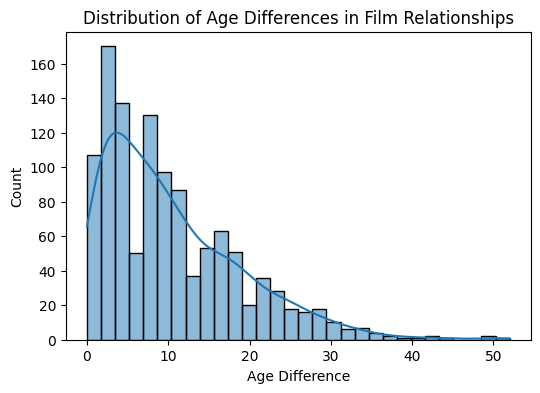

In [ ]:
# Dominant age-gap pattern

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(age_gaps["age_difference"], bins=30, kde=True)
plt.title("Distribution of Age Differences in Film Relationships")
plt.xlabel("Age Difference")
plt.ylabel("Count")
plt.show()

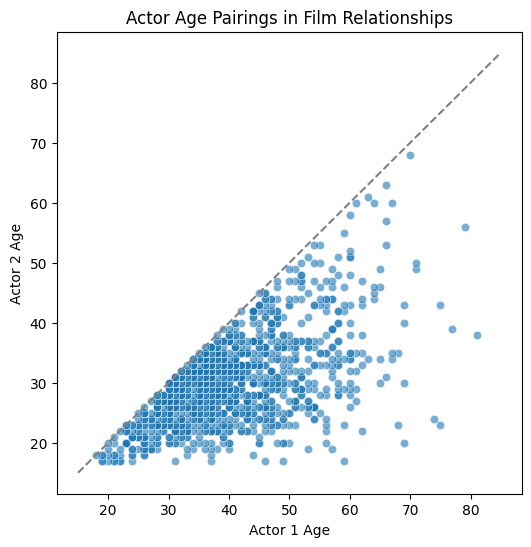

In [ ]:
# Dominant age pairing structure

plt.figure(figsize=(6,6))
sns.scatterplot(
    x=age_gaps["actor_1_age"],
    y=age_gaps["actor_2_age"],
    alpha=0.6
)
plt.plot([15, 85], [15, 85], linestyle="--", color="gray")  # reference diagonal
plt.xlabel("Actor 1 Age")
plt.ylabel("Actor 2 Age")
plt.title("Actor Age Pairings in Film Relationships")
plt.show()

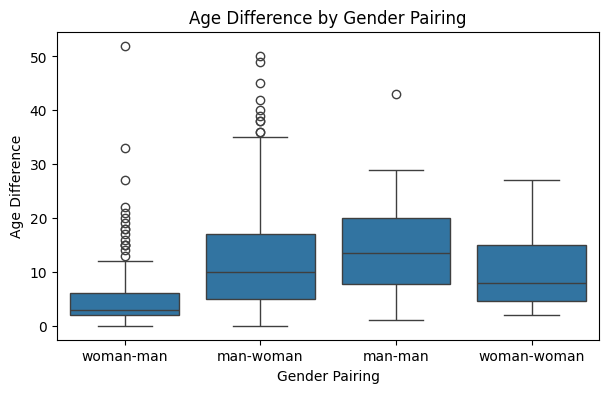

,count
gender_pair,
man-woman,929
woman-man,203
man-man,12
woman-woman,11


In [ ]:
# Gender-based dominant patterns

age_gaps["gender_pair"] = (
    age_gaps["character_1_gender"] + "-" + age_gaps["character_2_gender"]
)

plt.figure(figsize=(7,4))
sns.boxplot(
    data=age_gaps,
    x="gender_pair",
    y="age_difference"
)
plt.title("Age Difference by Gender Pairing")
plt.xlabel("Gender Pairing")
plt.ylabel("Age Difference")
plt.show()

# Counts (dominance check)
age_gaps["gender_pair"].value_counts()


In [ ]:
# Identify candidate atypical films

# Top 5% most extreme age gaps
threshold = age_gaps["age_difference"].quantile(0.95)

atypical_candidates = age_gaps[
    age_gaps["age_difference"] >= threshold
][[
    "movie_name",
    "release_year",
    "age_difference",
    "actor_1_age",
    "actor_2_age",
    "gender_pair"
]]

atypical_candidates.head(10)

,movie_name,release_year,age_difference,actor_1_age,actor_2_age,gender_pair
0,Harold and Maude,1971,52,75,23,woman-man
1,Venus,2006,50,74,24,man-woman
2,The Quiet American,2002,49,69,20,man-woman
3,The Big Lebowski,1998,45,68,23,man-woman
4,Beginners,2010,43,81,38,man-man
5,Poison Ivy,1992,42,59,17,man-woman
6,Whatever Works,2009,40,62,22,man-woman
7,Entrapment,1999,39,69,30,man-woman
8,Husbands and Wives,1992,38,57,19,man-woman
9,Magnolia,1999,38,77,39,man-woman


#Feature Engnieering

In [ ]:
import numpy as np

df = age_gaps.copy()

In [ ]:
df["mean_age"] = (df["actor_1_age"] + df["actor_2_age"]) / 2
df["relative_age_gap"] = df["age_difference"] / df["mean_age"]

In [ ]:
df["male_older"] = (
    (df["character_1_gender"] == "man") &
    (df["actor_1_age"] > df["actor_2_age"])
).astype(int)

df["female_older"] = (
    (df["character_1_gender"] == "woman") &
    (df["actor_1_age"] > df["actor_2_age"])
).astype(int)

In [ ]:
df["era"] = pd.cut(
    df["release_year"],
    bins=[1930, 1970, 1990, 2010, 2030],
    labels=["pre_1970", "1970_1989", "1990_2009", "post_2010"]
)

In [ ]:
features = df[[
    "relative_age_gap",
    "mean_age",
    "female_older",
    "same_gender"
]]

features = pd.concat(
    [features, pd.get_dummies(df["era"], drop_first=True)],
    axis=1
)

In [ ]:
df.head()

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age,gender_pair,mean_age,relative_age_gap,male_older,female_older,era
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23,woman-man,49.0,1.061224,0,1,1970_1989
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24,man-woman,49.0,1.020408,1,0,1990_2009
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20,man-woman,44.5,1.101124,1,0,1990_2009
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23,man-woman,45.5,0.989011,1,0,1990_2009
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38,man-man,59.5,0.722689,1,0,1990_2009


### Q1. How common are films where the female actress is older than the male actor?

In [ ]:
df["female_older"].value_counts()
df["female_older"].value_counts(normalize=True)

,proportion
female_older,
0,0.830303
1,0.169697


### Q2. Do female-older films have larger relative age gaps than the dominant pattern?

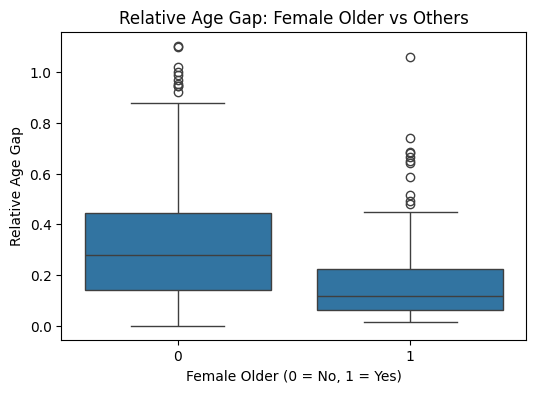

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="female_older",
    y="relative_age_gap"
)
plt.xlabel("Female Older (0 = No, 1 = Yes)")
plt.ylabel("Relative Age Gap")
plt.title("Relative Age Gap: Female Older vs Others")
plt.show()

### Q3. How do age gaps differ between same-gender and opposite-gender relationships?

In [ ]:
df["same_gender"] = (
    df["character_1_gender"] == df["character_2_gender"]
).astype(int)

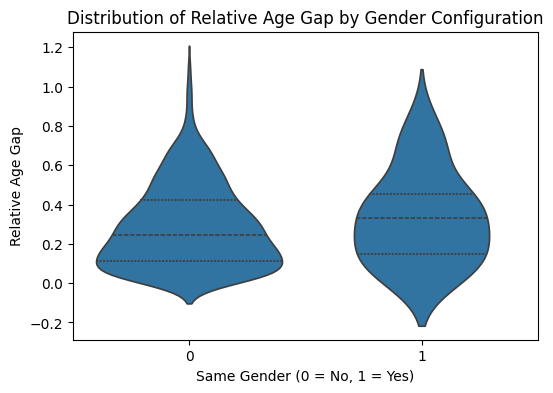

In [ ]:
plt.figure(figsize=(6,4))
sns.violinplot(
    data=df,
    x="same_gender",
    y="relative_age_gap",
    inner="quartile"
)
plt.xlabel("Same Gender (0 = No, 1 = Yes)")
plt.ylabel("Relative Age Gap")
plt.title("Distribution of Relative Age Gap by Gender Configuration")
plt.show()

### Q4. Do same-gender relationships show greater variability in relative age gaps?

In [ ]:
df.groupby("same_gender")["relative_age_gap"].describe()

,count,mean,std,min,25%,50%,75%,max
same_gender,,,,,,,,
0,1132.0,0.285616,0.210011,0.000000,0.114778,0.246095,0.421053,1.105263
1,23.0,0.331289,0.232377,0.031746,0.148352,0.333333,0.455769,0.840580


### Q5. How often do same-gender films appear across different eras?

In [ ]:
female_older_by_era = (
    df.groupby("era")["female_older"]
    .mean()
    .reset_index()
)

female_older_by_era

/tmp/ipython-input-1454509740.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("era")["female_older"]


,era,female_older
0,pre_1970,0.088889
1,1970_1989,0.107143
2,1990_2009,0.165391
3,post_2010,0.216463


### Q6. How often do same-gender films appear across different eras?


In [ ]:
same_gender_by_era = (
    df.groupby("era")["same_gender"]
    .mean()
    .reset_index()
)

same_gender_by_era

/tmp/ipython-input-3169394979.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("era")["same_gender"]


,era,same_gender
0,pre_1970,0.000000
1,1970_1989,0.000000
2,1990_2009,0.018377
3,post_2010,0.033537


The findings show that a small number of Hollywood films deviate from the dominant age- and gender-based relationship patterns by having much larger relative age gaps. These atypical films are mainly characterized by strong age imbalances and certain gender configurations, which make them different from most Hollywood productions.

#Feature Normalization

In [ ]:
cluster_df = df[[
    "relative_age_gap",
    "mean_age"
]]
cluster_df

,relative_age_gap,mean_age
0,1.061224,49.0
1,1.020408,49.0
2,1.101124,44.5
3,0.989011,45.5
4,0.722689,59.5
...,...,...
1150,0.000000,23.0
1151,0.000000,42.0
1152,0.000000,30.0
1153,0.000000,21.0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Normalize df
df_normalized = pd.DataFrame(sc.fit_transform(cluster_df), columns=cluster_df.columns)

df_normalized

,relative_age_gap,mean_age
0,3.682485,1.693628
1,3.488467,1.693628
2,3.872143,1.132271
3,3.339223,1.257017
4,2.073278,3.003460
...,...,...
1150,-1.361979,-1.549765
1151,-1.361979,0.820407
1152,-1.361979,-0.676544
1153,-1.361979,-1.799257


#K-means Clustering

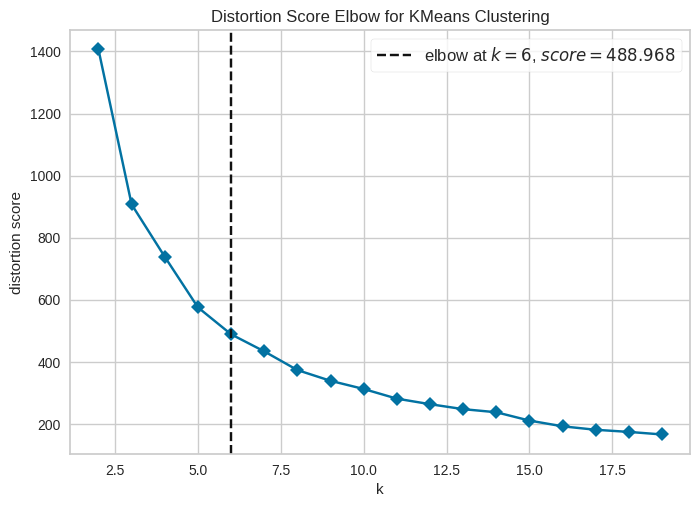

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 20), metric='distortion', timings=False, random_state=42  #metric='silhouette' metric='distortion'
)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

I tried k = 2 to 20 at first, but this divided the data into too many pieces, so I then tried a smaller k.

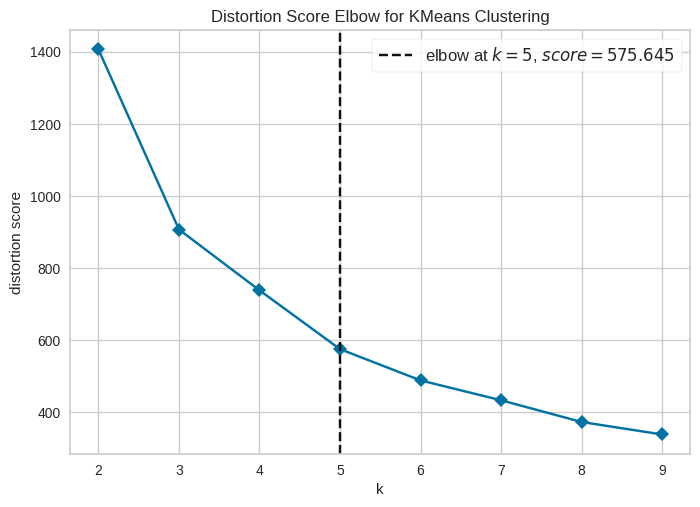

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustering = KMeans(random_state=42)
visualizer = KElbowVisualizer(
    clustering, k=(2, 10), metric='distortion', timings=False, random_state=42  #metric='silhouette' metric='distortion'
)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
n_clusters_kmeans = 4

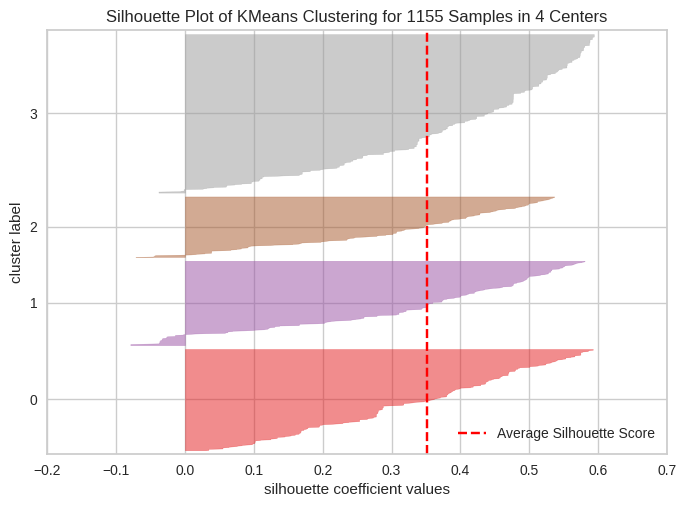

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1155 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

kmeans_model = KMeans(n_clusters_kmeans, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model, timings=False)

visualizer.fit(df_normalized)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans model with n_clusters and random_state=42
kmeans = KMeans(n_clusters=n_clusters_kmeans, random_state=42) # Trye different number of clusters

# Fit the model and predict cluster labels, excluding the existing 'cluster_labels' column
df_normalized['cluster_labels'] = kmeans.fit_predict(df_normalized).astype(str)

# Display the value counts of the new cluster labels
print(df_normalized['cluster_labels'].value_counts())

cluster_labels
3    452
0    289
1    241
2    173
Name: count, dtype: int64


In [ ]:
data_plot=df.copy()
data_plot=df.drop(columns=['actor_1_age',	'actor_2_age', 'age_difference', 'mean_age',	'relative_age_gap'])

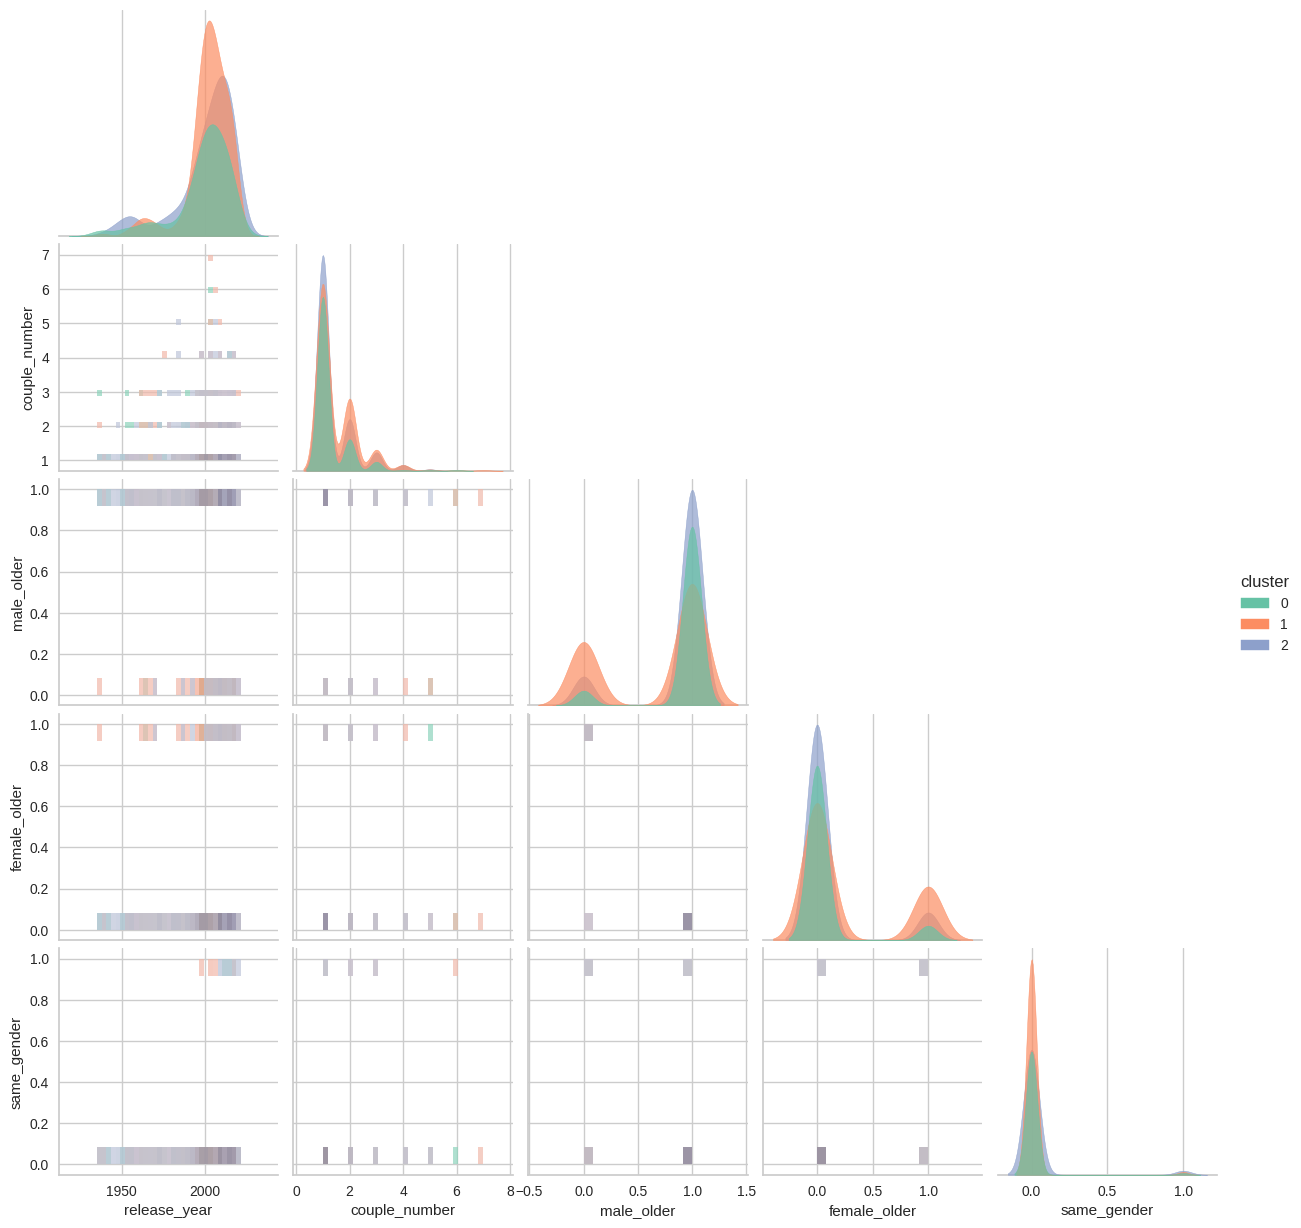

In [ ]:
data_plot["cluster"] = df["cluster"]

sns.pairplot(data_plot, hue="cluster", kind="hist", diag_kind="kde", corner=True, palette="Set2",
    plot_kws={'alpha': 0.7}, # Adjusts transparency of the scatter points (0.0 to 1.0)
    diag_kws={'alpha': 0.7}  # Adjusts transparency of the diagonal plots (histograms/KDEs)
    )

/tmp/ipython-input-3526153758.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalized, x='cluster_labels', y="relative_age_gap", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='relative_age_gap'>

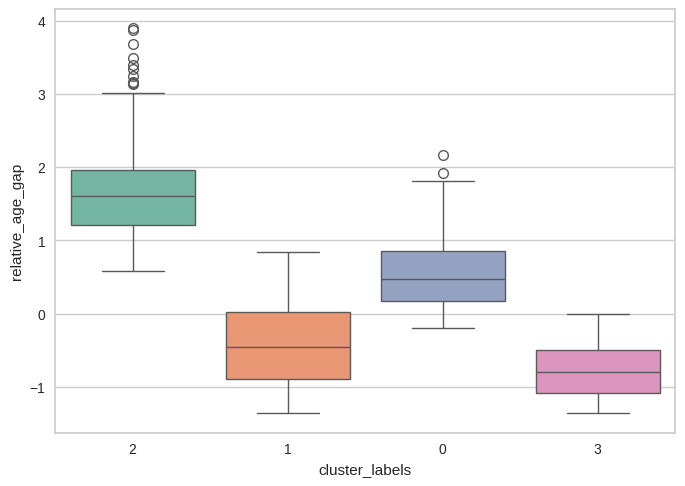

In [ ]:
# Show boxplots of all features per cluster
sns.boxplot(data=df_normalized, x='cluster_labels', y="relative_age_gap", palette="Set2")

/tmp/ipython-input-1687159019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalized, x='cluster_labels', y="mean_age", palette="Set2")


<Axes: xlabel='cluster_labels', ylabel='mean_age'>

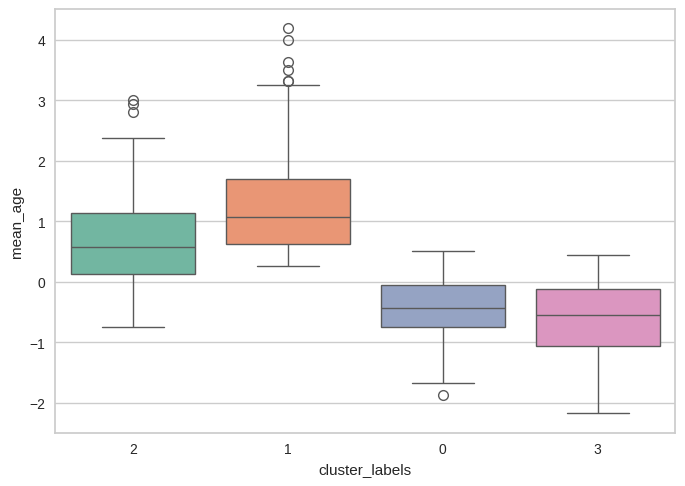

In [ ]:
# Show boxplots of all features per cluster
sns.boxplot(data=df_normalized, x='cluster_labels', y="mean_age", palette="Set2")

#Findings & Interpretations

In [ ]:
df.head()

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,...,actor_1_age,actor_2_age,gender_pair,mean_age,relative_age_gap,male_older,female_older,era,same_gender,cluster
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,...,75,23,woman-man,49.0,1.061224,0,1,1970_1989,0,2
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,...,74,24,man-woman,49.0,1.020408,1,0,1990_2009,0,2
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,...,69,20,man-woman,44.5,1.101124,1,0,1990_2009,0,2
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,...,68,23,man-woman,45.5,0.989011,1,0,1990_2009,0,2
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,...,81,38,man-man,59.5,0.722689,1,0,1990_2009,1,2


In [ ]:
# 1) Group by number of each female_older
df.groupby("cluster")["female_older"].value_counts()


cluster  female_older
0        0               267
         1                22
1        0               325
         1               127
2        0               367
         1                47
Name: count, dtype: int64

In [ ]:
# 2) Group by ratio of each female_older
df.groupby("cluster")["female_older"].value_counts(normalize=True)

cluster  female_older
0        0               0.923875
         1               0.076125
1        0               0.719027
         1               0.280973
2        0               0.886473
         1               0.113527
Name: proportion, dtype: float64

In [ ]:
# 3) Group by number of each same_gender
df.groupby("cluster")["same_gender"].value_counts()


cluster  same_gender
0        0              285
         1                4
1        0              446
         1                6
2        0              401
         1               13
Name: count, dtype: int64

In [ ]:
# 4) Group by ratio of each same_gender
df.groupby("cluster")["same_gender"].value_counts(normalize=True)

cluster  same_gender
0        0              0.986159
         1              0.013841
1        0              0.986726
         1              0.013274
2        0              0.968599
         1              0.031401
Name: proportion, dtype: float64

In [ ]:
import pandas as pd

cluster_props = (
    df.groupby("cluster")
      .agg(
          prop_female_older=("female_older", "mean"),
          prop_same_gender=("same_gender", "mean")
      )
      .reset_index()
)

cluster_props

,cluster,prop_female_older,prop_same_gender
0,0,0.076125,0.013841
1,1,0.280973,0.013274
2,2,0.113527,0.031401


/tmp/ipython-input-3867719179.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cluster", "era"])["female_older"]


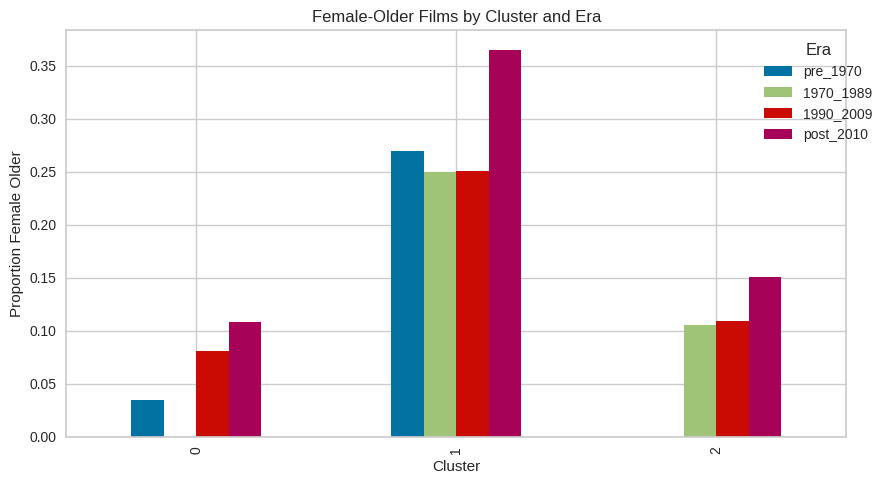

In [ ]:
pivot = (
    df.groupby(["cluster", "era"])["female_older"]
      .mean()
      .unstack()
)

pivot.plot(kind="bar", figsize=(9, 5))
plt.title("Female-Older Films by Cluster and Era")
plt.ylabel("Proportion Female Older")
plt.xlabel("Cluster")
plt.legend(title="Era", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

/tmp/ipython-input-3131143.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["cluster", "era"])["same_gender"]


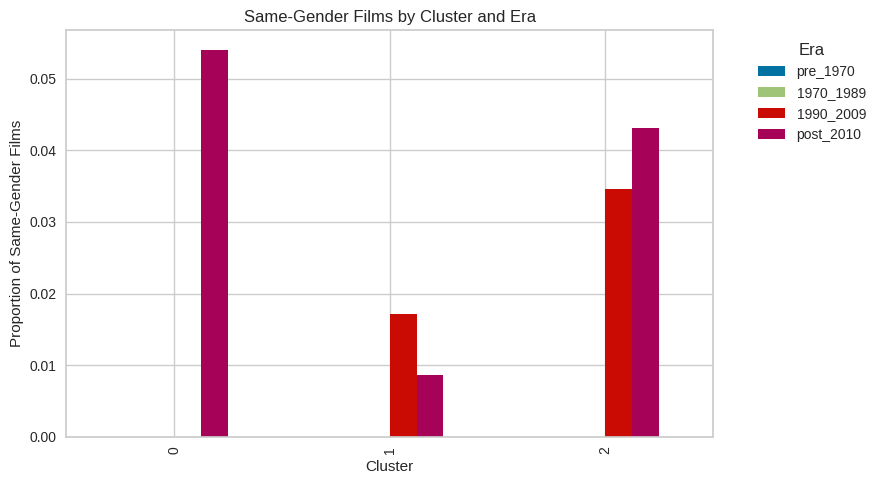

In [ ]:
pivot = (
    df.groupby(["cluster", "era"])["same_gender"]
      .mean()
      .unstack()
)

pivot.plot(kind="bar", figsize=(9, 5))
plt.title("Same-Gender Films by Cluster and Era")
plt.ylabel("Proportion of Same-Gender Films")
plt.xlabel("Cluster")
plt.legend(title="Era", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()